# Data Cookbook

In [16]:
#Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The dataset documents police treatment of individuals arrested in Toronto for simple possession of small quantities of marijuana. The data is part of a larger data set featured in a series of articles in the Toronto Star newspaper.
The sample used for the project was found on Kaggle (https://www.kaggle.com/datasets/utkarshx27/arrests-for-marijuana-possession?resource=download)

In [17]:
#Reading the dataset

df=pd.read_csv('Arrests.csv')
df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5226 entries, 0 to 5225
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5226 non-null   int64 
 1   released    5226 non-null   object
 2   colour      5226 non-null   object
 3   year        5226 non-null   int64 
 4   age         5226 non-null   int64 
 5   sex         5226 non-null   object
 6   employed    5226 non-null   object
 7   citizen     5226 non-null   object
 8   checks      5226 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 367.6+ KB


# Recipe 1: Finding summaries such as mean, max, min


In [19]:
#Finding maximum age for all instances

max_age = df['age'].max()
max_age

66

In [20]:
#Finding minimum age

min_age = df['age'].min()
min_age

12

# Recipe 2: Using group_by to find specific summaries

Here, we use the groupby() method to group the dataframe by 'colour','sex' and 'year' and calculate the mean age for each group using the mean() method. 

In [33]:
#Finding the mean age by race

avg_age_race = df.groupby('colour')['age'].mean()

print(avg_age_race)

colour
Black    24.825311
White    23.526409
Name: age, dtype: float64


In [32]:
#Finding the mean age by sex

avg_age_sex= df.groupby('sex')['age'].mean()

print(avg_age_sex)

sex
Female    23.532731
Male      23.875601
Name: age, dtype: float64


In [31]:
#Finding the mean age by year

avg_age_year = df.groupby('year')['age'].mean()

print(avg_age_year)

year
1997    23.955285
1998    23.676169
1999    24.233849
2000    23.475591
2001    24.073493
2002    23.364621
Name: age, dtype: float64


# Recipe 3: Adding a new column

In this example, we add a new column to the dataframe called 'year_diff' that calculates the difference between 2018, which is the year cannibis became legal in Toronto and the 'year' column using the subtraction operator.

In [24]:
#Adding a new column for the difference between 2018 and the 'year' column
df['year_diff'] = 2018 - df['year']

df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks,year_diff
0,1,Yes,White,2002,21,Male,Yes,Yes,3,16
1,2,No,Black,1999,17,Male,Yes,Yes,3,19
2,3,Yes,White,2000,24,Male,Yes,Yes,3,18
3,4,No,Black,2000,46,Male,Yes,Yes,1,18
4,5,Yes,Black,1999,27,Female,Yes,Yes,1,19


# Recipe 4: Using group_by and count

We use the groupby() method to group the dataframe by 'year_diff' and then use the transform() method to count the number of instances for each group. We then assign the result to the new column 'year_diff_count'. 

In [25]:

df['year_diff_count'] = df.groupby('year_diff')['year_diff'].transform('count')
df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks,year_diff,year_diff_count
0,1,Yes,White,2002,21,Male,Yes,Yes,3,16,277
1,2,No,Black,1999,17,Male,Yes,Yes,3,19,1099
2,3,Yes,White,2000,24,Male,Yes,Yes,3,18,1270
3,4,No,Black,2000,46,Male,Yes,Yes,1,18,1270
4,5,Yes,Black,1999,27,Female,Yes,Yes,1,19,1099


# Recipe 5: Using matplotlib to create vizualization 

First, we calculate the count of instances for each 'year_diff' using the value_counts() method on the 'year_diff' column. We then use the plt.bar() method to create a bar graph with 'year_diff' on the x-axis and 'year_diff_count' on the y-axis. We then add labels for the x and y axes as well as a title for the graph using the plt.xlabel(), plt.ylabel(), and plt.title() methods, respectively.

Second, we first use the groupby() method to group the dataframe by 'colour' and then calculate the sum of 'checks' for each 'colour'. We then use the plt.bar() method to create a bar graph with 'colour' on the x-axis and 'checks_count' on the y-axis. We then add labels as described above.

Using the same method, we create a bar graph for released status by race.

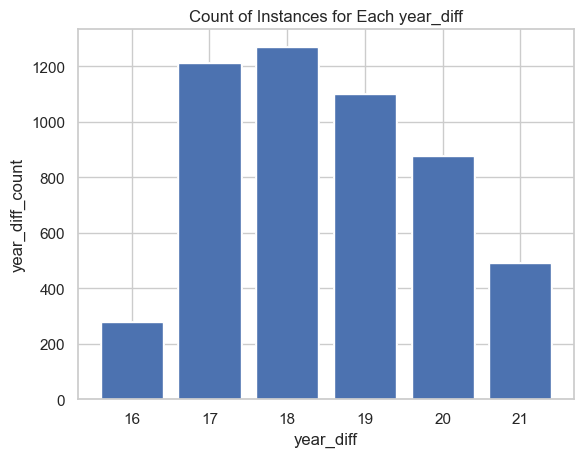

In [26]:
# create a bar graph with year_diff on x-axis and count on y-axis
plt.bar(df.year_diff, df.year_diff_count)
plt.xlabel('year_diff')
plt.ylabel('year_diff_count')
plt.title('Count of Instances for Each year_diff')
plt.show()

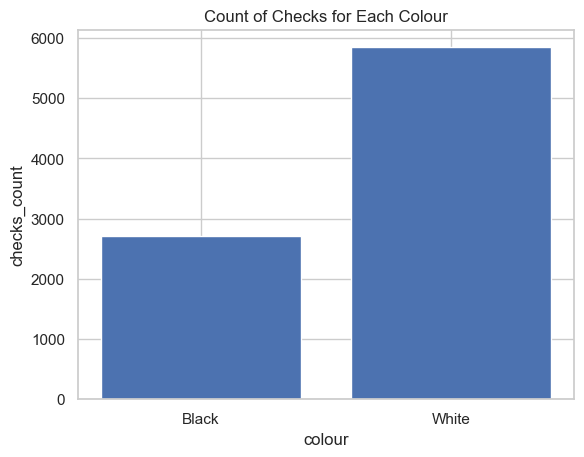

In [27]:
# calculate the count of checks for each colour
checks_count = df.groupby('colour')['checks'].sum()

# create a bar graph with colour on x-axis and checks_count on y-axis
plt.bar(checks_count.index, checks_count.values)
plt.xlabel('colour')
plt.ylabel('checks_count')
plt.title('Count of Checks for Each Colour')
plt.show()

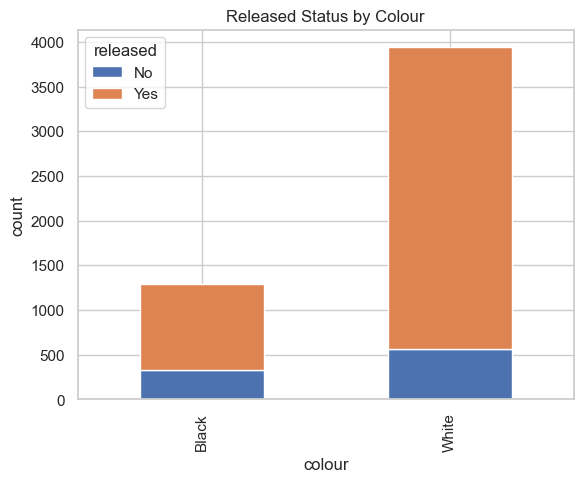

In [28]:
# calculate the count of released status for each colour
released_count = df.groupby(['colour', 'released']).size().unstack()

# create a stacked bar graph with colour on x-axis and released_count on y-axis
released_count.plot(kind='bar', stacked=True)
plt.xlabel('colour')
plt.ylabel('count')
plt.title('Released Status by Colour')
plt.show()

In the following chunk, we first group the dataframe by 'colour' and 'released' columns using the groupby() method, and then count the number of instances by 'colour' and 'released' using the size() method. We rename the resulting column to 'released_count' using the reset_index() method.

Next, we group the resulting dataframe by 'colour' using the groupby() method, and calculate the total count for each color by summing the 'released_count' column using the sum() method. We then use the reset_index() method to create a new dataframe with two columns: 'colour' and 'total_count'.

# Recipe 6: Merging dataframes 

We merge the two dataframes using the pd.merge() method and specifying which column we want to merge the data on, to create a new dataframe with three columns: 'colour', 'released_count', and 'total_count'.

# Recipe 7: Standardizing a count 

Finally, we calculate the standardized count for each released status by dividing the 'released_count' column by the 'total_count' column, and store the result in a new 'standardized_count' column. This allows us to factor out the effect of the number of instances for each race in our count.  

# Recipe 8: Creating a bar graph using Seaborn instead of matplotlib

Lastly, we combine all of the above to recreate the bar graph of released status by race using seaborn this time. We use the sns.barplot() method to create a stacked bar chart with 'colour' on the x-axis and 'standardized_count' on the y-axis, using the 'released' column to distinguish between 'Yes' and 'No' values. We use the sns.set(), plt.xlabel(), plt.ylabel(), plt.title(), and plt.show() methods as before to set the style of the graph and add labels and a title.

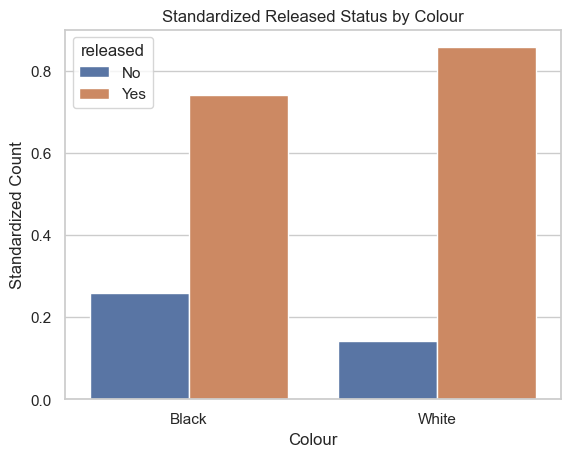

In [30]:
# group the dataframe by colour and released status, and count the number of instances
grouped = df.groupby(['colour', 'released']).size().reset_index(name='released_count')

# calculate the total count for each color
total_count = grouped.groupby('colour')['released_count'].sum().reset_index(name='total_count')

# merge the grouped and total_count dataframes
merged = pd.merge(grouped, total_count, on='colour')

# calculate the standardized count for each released status by dividing released_count by total_count
merged['standardized_count'] = merged['released_count'] / merged['total_count']

# create a stacked bar chart with colour on the x-axis and standardized count on the y-axis
sns.set(style="whitegrid")
sns.barplot(x='colour', y='standardized_count', hue='released', data=merged)
plt.xlabel('Colour')
plt.ylabel('Standardized Count')
plt.title('Standardized Released Status by Colour')
plt.show()